In [1]:
import pandas as pd
agc_data = pd.read_csv('/project_data/data_asset/Dataset_AGC_Final.csv')
agc_data.head()

,Name,NRIC,Nationality,Age,Gender,Date(s) of Offence,Offence,Time of Offence,Monetary amount involved,Statutory Provision,Penal Code Term Tenure,Penal Code Fine Guideline,Repeated Offender,Employment Status,Canning,Jail term,Fine
0,Tan Ah Kow,S1234567X,Singaporean,51,Male,10/01/2016-04/04/2016,Misappropriation,NaN,35000.00,408,15,5000,Yes,Unemployed,0,12.0,6000
1,Charles Goh,G1234567T,Malaysian,37,Male,5/9/17,Misappropriation,4:00:00 PM,900.00,"406 , 34",7,100,No,Employed,0,3.0,100
2,Lim Swee Noi,S7654321X,Singaporean,35,Female,7/4/19,Misappropriation,NaN,3500.25,408,15,1000,Yes,Employed,0,5.0,1200
3,Vincent Loh,S8763456B,Singaporean,44,Male,12/7/18,Outrage Modesty,4:00:00 PM,NaN,354(1),2,500,No,Unemployed,5,1.0,500
4,Tan Ser Kow,S4567899B,Malaysian,34,Male,12/6/18,Outrage Modesty,5:00:00 PM,NaN,354(1),2,400,Yes,Unemployed,8,1.0,480


In [17]:
df = agc_data.sort_values(by=' Fine')
df.to_csv("/project_data/data_asset/AGC_CrimeData_1.csv",index=False)

In [20]:
import os
add_file_path_as_data_asset("/project_data/data_asset/AGC_CrimeData_1.csv")

File Added as Data Assset


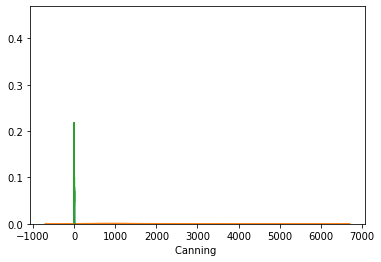

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(agc_data['Canning '])

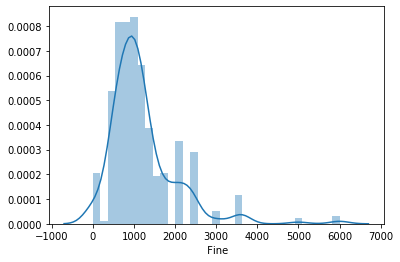

In [9]:
sns.distplot(agc_data[' Fine'])

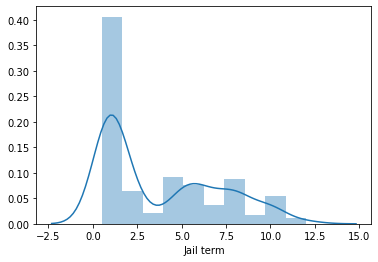

In [10]:
sns.distplot(agc_data['Jail term'])

In [15]:
def extract_date(datedstring):
    res = datedstring.split("/")
    each = None
    if len(res[-1]) == 2:
        each = "20"+str(res[-1])
    else:
        each = str(res[-1])
    return each
       

In [16]:
agc_data['Year'] = agc_data['Date(s) of Offence'].apply(extract_date)

In [20]:
agc_data.to_csv("test.csv",index= False)
add_file_path_as_data_asset('test.csv',"AGC_CrimeData.csv")

File Added as Data Assset


In [3]:
agc_data.describe()

,Age,Monetary amount involved,Penal Code Term Tenure,Penal Code Fine Guideline,Canning,Jail term,Fine
count,512.000000,267.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,39.730469,11179.899813,7.253906,1063.925781,2.908203,3.788086,1196.066406
std,9.886123,7317.368045,5.798136,708.475679,3.307078,3.276034,815.694844
min,21.000000,800.000000,1.000000,0.000000,0.000000,0.500000,0.000000
25%,32.000000,5000.000000,2.000000,700.000000,0.000000,1.000000,700.000000
50%,38.000000,10000.000000,7.000000,900.000000,0.000000,2.000000,1000.000000
75%,45.000000,12500.000000,15.000000,1200.000000,5.000000,6.000000,1440.000000
max,67.000000,35000.000000,15.000000,5000.000000,14.000000,12.000000,6000.000000


In [4]:
agc_data.dtypes

Name                          object
NRIC                          object
Nationality                   object
Age                            int64
Gender                        object
Date(s) of Offence            object
Offence                       object
Time of Offence               object
Monetary amount involved     float64
Statutory Provision           object
Penal Code Term Tenure         int64
Penal Code Fine Guideline    float64
Repeated Offender             object
Employment Status             object
Canning                        int64
Jail term                    float64
 Fine                        float64
dtype: object

In [5]:
def preprocess(df):
    existing = list(df.columns)
    modified_cols = [each.replace(' ','_') for each in existing]
    modified_cols = [each.strip("_") for each in modified_cols]
    df.columns = modified_cols
    Unwanted_cols = ['Time_of_Offence','Date(s)_of_Offence','Name','NRIC']
    df.drop(Unwanted_cols,axis =1,inplace=True)
    df['Jail_term']= agc_data['Jail_term'].astype(int)
    df['Fine']= agc_data['Fine'].astype(int)
    return df

In [6]:
agc_data = preprocess(agc_data)
agc_data.head()

,Nationality,Age,Gender,Offence,Monetary_amount_involved,Statutory_Provision,Penal_Code_Term_Tenure,Penal_Code_Fine_Guideline,Repeated_Offender,Employment_Status,Canning,Jail_term,Fine
0,Singaporean,51,Male,Misappropriation,35000.00,408,15,5000.0,Yes,Unemployed,0,12,6000
1,Malaysian,37,Male,Misappropriation,900.00,"406 , 34",7,100.0,No,Employed,0,3,100
2,Singaporean,35,Female,Misappropriation,3500.25,408,15,1000.0,Yes,Employed,0,5,1200
3,Singaporean,44,Male,Outrage Modesty,NaN,354(1),2,500.0,No,Unemployed,5,1,500
4,Malaysian,34,Male,Outrage Modesty,NaN,354(1),2,400.0,Yes,Unemployed,8,1,480


In [7]:
agc_data.shape

(512, 13)

### Categorical boolean mask

### Filter categorical columns using mask and turn it into a list

### Apply Encoding on categorical feature columns

In [8]:
def feature_engineer(df):
    from sklearn.preprocessing import LabelEncoder
    categorical_feature_mask = agc_data.dtypes==object
    categorical_cols = agc_data.columns[categorical_feature_mask].tolist()
    # apply encoder on categorical feature columns
    encoder = LabelEncoder()
    agc_data[categorical_cols] = agc_data[categorical_cols].apply(lambda col: encoder.fit_transform(col))
    agc_data['Monetary_amount_involved'].fillna(0, inplace=True)
    return agc_data

In [9]:
agc_data = feature_engineer(agc_data)
agc_data.head()

,Nationality,Age,Gender,Offence,Monetary_amount_involved,Statutory_Provision,Penal_Code_Term_Tenure,Penal_Code_Fine_Guideline,Repeated_Offender,Employment_Status,Canning,Jail_term,Fine
0,4,51,1,0,35000.00,2,15,5000.0,1,1,0,12,6000
1,2,37,1,0,900.00,1,7,100.0,0,0,0,3,100
2,4,35,0,0,3500.25,2,15,1000.0,1,0,0,5,1200
3,4,44,1,1,0.00,0,2,500.0,0,1,5,1,500
4,2,34,1,1,0.00,0,2,400.0,1,1,8,1,480


### Declare Dependent and Target Variables
### Multi-Output Targets

In [10]:
Y = agc_data.iloc[:,10:]
X = agc_data.iloc[:,:10]

### Model  Selection and Building 

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
knnregress = KNeighborsRegressor()
rfregressor = RandomForestRegressor()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(409, 10) (409, 3)
(103, 10) (103, 3)


In [13]:
knnregress.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [14]:
rfregressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Create the parameter grid based on the results of random search 

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [16]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.9min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [17]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Model Prediction

In [18]:
from sklearn.metrics import r2_score
predictions_1 = knnregress.predict(X_test)
predictions_2 = rfregressor.predict(X_test)
score_knn = r2_score(y_test,predictions_1)
score_rf = r2_score(y_test,predictions_2)
score_knn,score_rf

(0.9899682434054128, 0.9861615897833822)

In [19]:
predictions = best_grid.predict(X_test)
grid_score_rf = r2_score(y_test,predictions)
grid_score_rf

0.9810052092668036

 ### Best Model

In [20]:
def get_best_model(model_lists):
    scores = {}
    for each in model_lists:
        scores[each]= r2_score(y_test,each.predict(X_test))
    
    return sorted(scores, key=scores.get, reverse=True)[0]
model_lists = [knnregress,rfregressor,best_grid]
final_model = get_best_model(model_lists)

### Model deployment

In [21]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
import os
token = os.environ['USER_ACCESS_TOKEN']

wml_credentials = {
    "token":token,
    "instance_id" : "openshift",
     "url": os.environ['RUNTIME_ENV_APSX_URL'],
     "version": "3.0.0"
}
client = WatsonMachineLearningAPIClient(wml_credentials)
project_uid = os.environ['PROJECT_ID']
    

### Create Deployment Space

In [ ]:
#  space_meta = {
#     client.spaces.ConfigurationMetaNames.NAME:"Sentence_Prediction"
# }
# spaces_details = client.spaces.store(space_meta)
# spaces_details

In [23]:
client.spaces.list(limit=5)

------------------------------------  -------------------  ------------------------
GUID                                  NAME                 CREATED
310b8872-1254-47d3-8cca-538a71da719c  Sentence_Prediction  2020-06-29T14:38:53.090Z
------------------------------------  -------------------  ------------------------


### Get GUID From Space

In [24]:
 def guid_from_space_name(client, space_name):
    instance_details = client.service_instance.get_details()
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

In [25]:
space_uid = guid_from_space_name(client,"Sentence_Prediction")
space_uid

'310b8872-1254-47d3-8cca-538a71da719c'

In [26]:
client.set.default_space(space_uid)

'SUCCESS'

In [18]:
def add_file_path_as_data_asset(file_path: str, asset_name: str = None) -> None:
    if asset_name is None:
        asset_name = os.path.basename(file_path)
    try:
        with open(file_path, 'rb') as f:
            from project_lib import Project
            project = Project.access()
            project.save_data(file_name=asset_name, data=f, overwrite=True)
        print("File Added as Data Assset")
    except Exception as e:
        pass


### Model Saving

In [29]:
import pickle
filename = '/project_data/data_asset/sentence_model.mod'
pickle.dump(final_model, open(filename, 'wb'))
add_file_path_as_data_asset(filename)

File Added as Data Assset


In [30]:
client.data_assets.list()

------------------  ----------  -----  ------------------------------------
NAME                ASSET_TYPE  SIZE   ASSET_ID
sentence_model.mod  data_asset  82701  45103d9c-c803-45f0-9439-49ca2864da48
------------------  ----------  -----  ------------------------------------


In [41]:
model_details = client.data_assets.get_details("45103d9c-c803-45f0-9439-49ca2864da48")
model_id = client.data_assets.get_uid(model_details)
params = {
    "wml_credentials": wml_credentials,
    "space_uid": space_uid,
    "model_id": model_id
}

In [136]:
def sentence_model_function(params=params):
    import subprocess
    import sklearn
    import sys,time
    import pickle
    from watson_machine_learning_client import WatsonMachineLearningAPIClient
    
    params['wml_credentials']['instance_id'] = 'openshift'
    
    sys.path.insert(0,'/home/wmlfuser/.local/lib/python3.6/site-packages/')
    sys.path.insert(0, './')

    
    # Setup Client
    client = WatsonMachineLearningAPIClient(params['wml_credentials'])
    client.set.default_space(params['space_uid'])
    
    #Download Required Models and Files locally
    client.data_assets.download(params['model_id'],"model_id")
    
    def preprocess(df):
        existing = list(df.columns)
        modified_cols = [each.replace(' ','_') for each in existing]
        modified_cols = [each.strip("_") for each in modified_cols]
        df.columns = modified_cols
        Unwanted_cols = ['Time_of_Offence','Date(s)_of_Offence','Name','NRIC']
        df.drop(Unwanted_cols,axis =1,inplace=True)
        return df

    
    def feature_engineer(df):
        agc_data = preprocess(df)
        from sklearn.preprocessing import LabelEncoder
        categorical_feature_mask = agc_data.dtypes==object
        categorical_cols = agc_data.columns[categorical_feature_mask].tolist()
        # apply encoder on categorical feature columns
        encoder = LabelEncoder()
        agc_data[categorical_cols] = agc_data[categorical_cols].apply(lambda col: encoder.fit_transform(col))
        agc_data['Monetary_amount_involved'].fillna(0, inplace=True)
        return agc_data
        
    

    def score(payload):
        
        import pandas as pd
        import numpy as np
              
        try:
            #Load the Saved Model
            with open('model_id','rb') as f:
                sentence_model = pickle.load(f)
                
            #Decode a Dataframe from Payload Json

            values = payload['input_data'][0]['values']
            fields = payload['input_data'][0]['fields']
            
            data = pd.DataFrame(values,columns=fields)
                       
            values = data.values.tolist()
            
            #Preprocess the raw data load before scoring
            df_data = feature_engineer(data)
                       
            X = data
            y = sentence_model.predict(df_data)
                      
            y = y.tolist()
            
            for i, each in enumerate(y):
                each = [int(val) for val in each]
                values[i].extend(each)
                

                    
            #return {'predictions':[{'fields':fields+['Canning','Jail term','Fine'],'values': values}]}
            return {'predictions':[{'fields':['Canning','Jail term','Fine'],'sentences': y}]}
        
        except Exception as e:
            
            return {"predictions": [{"error" : repr(e)}]}
        
    return score

### Test it locally

In [137]:
import pandas as pd
from sklearn.utils import shuffle
temp = pd.read_csv('/project_data/data_asset/Dataset_AGC_Final.csv')
cols = ['Canning ', 'Jail term', ' Fine']
temp.drop(cols,axis=1,inplace=True)
temp = shuffle(temp)
temp = temp.iloc[:1]
fields = list(temp.columns)
values = temp.values.tolist()
request_data = {"values": values, "fields": fields}
payload_data = {"input_data" : [request_data]} 

results = sentence_model_function()(payload_data)
results

Successfully saved data asset content to file: 'model_id'


{'predictions': [{'fields': ['Canning', 'Jail term', 'Fine'],
   'sentences': [[8.0, 1.0, 1000.0]]}]}

In [141]:
#client.software_specifications.list()
client.set.default_space(space_uid)

Unsetting the project_id ...


'SUCCESS'

In [138]:
software_spec_uid = client.software_specifications.get_uid_by_name('default_py3.6')
software_spec_uid

'0062b8c9-8b7d-44a0-a9b9-46c416adcbd9'

In [139]:
 meta_props = {
     client.repository.FunctionMetaNames.NAME: "sentence_model_V2",
     client.repository.FunctionMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
     client.repository.FunctionMetaNames.SPACE_UID: space_uid
 }

In [142]:
function_artifact = client.repository.store_function(meta_props=meta_props, function=sentence_model_function)
function_uid = client.repository.get_function_uid(function_artifact)
print("Function UID = " + function_uid)

Function UID = 5f9a102c-746c-4975-8885-2e2b1bb9b9d3


In [143]:
client.repository.get_details(function_uid)

{'metadata': {'name': 'sentence_model_V2',
  'guid': '5f9a102c-746c-4975-8885-2e2b1bb9b9d3',
  'id': '5f9a102c-746c-4975-8885-2e2b1bb9b9d3',
  'modified_at': '2020-07-01T04:30:42.002Z',
  'created_at': '2020-07-01T04:30:40.002Z',
  'owner': '1000331053',
  'href': '/v4/functions/5f9a102c-746c-4975-8885-2e2b1bb9b9d3?space_id=310b8872-1254-47d3-8cca-538a71da719c',
  'space_id': '310b8872-1254-47d3-8cca-538a71da719c'},
 'entity': {'space': {'id': '310b8872-1254-47d3-8cca-538a71da719c',
   'href': '/v4/spaces/310b8872-1254-47d3-8cca-538a71da719c'},
  'name': 'sentence_model_V2',
  'type': 'python',
  'software_spec': {'id': '0062b8c9-8b7d-44a0-a9b9-46c416adcbd9'}}}

In [144]:
client.repository.list_functions()

------------------------------------  -----------------------  ------------------------  ------
GUID                                  NAME                     CREATED                   TYPE
5f9a102c-746c-4975-8885-2e2b1bb9b9d3  sentence_model_V2        2020-07-01T04:30:40.002Z  python
2e3c835e-4516-4819-9124-67a3861d2255  sentence_model_function  2020-06-30T12:52:29.002Z  python
------------------------------------  -----------------------  ------------------------  ------


### Deployment metadata.

In [145]:
deploy_meta = {
    client.deployments.ConfigurationMetaNames.NAME: "sentence_model_V2",
    client.deployments.ConfigurationMetaNames.DESCRIPTION: "Sentence_Model_Function-deploy",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

### Create the Deployment

In [146]:
deployment_details = client.deployments.create(function_uid, meta_props=deploy_meta)
# Deployment UID.
deployment_uid = client.deployments.get_uid(deployment_details)
print('Deployment uid = {}'.format(deployment_uid))



#######################################################################################

Synchronous deployment creation for uid: '5f9a102c-746c-4975-8885-2e2b1bb9b9d3' started

#######################################################################################


initializing....
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='cda5f7cd-2dec-4b36-8abe-ca6579f7e347'
------------------------------------------------------------------------------------------------


Deployment uid = cda5f7cd-2dec-4b36-8abe-ca6579f7e347


### Prepare Scoring Payload

In [147]:
import pandas as pd
from sklearn.utils import shuffle
temp = pd.read_csv('/project_data/data_asset/Dataset_AGC_Final.csv')
cols = ['Canning ', 'Jail term', ' Fine']
temp.drop(cols,axis=1,inplace=True)
temp = shuffle(temp)
temp = temp.iloc[:1]
fields = list(temp.columns)
values = temp.values.tolist()
request_data = {"values": values, "fields": fields}
payload_data = {"input_data" : [request_data]} 


fields = payload_data['input_data'][0]['fields']
values = payload_data['input_data'][0]['values']

job_payload = {
    client.deployments.ScoringMetaNames.INPUT_DATA: [{
        'fields': fields,
        'values': values
    }]
}

In [148]:
#job_payload

In [149]:
job_details = client.deployments.score(deployment_uid, job_payload)
job_details

{'predictions': [{'fields': ['Canning', 'Jail term', 'Fine'],
   'sentences': [[0.0, 8.0, 1100.0]]}]}

In [121]:
project_id =os.environ['PROJECT_ID']
client.set.default_project(project_id)

Unsetting the space_id ...


'SUCCESS'

In [123]:
meta_props = {
     client.repository.FunctionMetaNames.NAME: "sentence_model_function",
     client.repository.FunctionMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
 }
function_artifact = client.repository.store_function(meta_props=meta_props, function=sentence_model_function)
function_uid = client.repository.get_function_uid(function_artifact)
print("Function UID = " + function_uid)


Function UID = 2c49ae37-b82a-4c4b-b2fc-8129e6dd3114
